In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd 
from scipy.signal import savgol_filter
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

Contents in csv file:
       0      1     2      3    4    5    6
0     1  10269  4085  14354  178  273  451
1     2   9491   277   9768   76  264  340
2     3  11143   395  11538   72  378  450
3     4  10631   345  10976   67  305  372
4     5  10053   292  10345   67  305  372
..  ...    ...   ...    ...  ...  ...  ...
95   96  13423   339  13762   72  319  391
96   97  13539   347  13886   80  309  389
97   98  13678   351  14029   73  353  426
98   99  13725   387  14112   71  324  395
99  100  13734   337  14071   72  332  404

[100 rows x 7 columns]


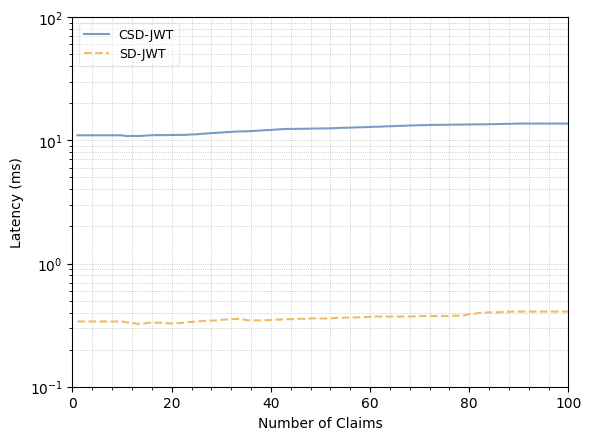

In [2]:
df = pd.read_csv("csv/issuer_generation_time.csv", header=None) #, usecols=columns)
print("Contents in csv file:\n", df)
# Create the figure and axis object
fig, ax = plt.subplots()  # This creates both the figure and the axis

window_size = 100

df[3] = df[3]/1e3
df[6] = df[6]/1e3

csd_color='#779ECB'
sd_color='#F2BB66'

# Plot the data
ax.plot(df[0], savgol_filter(df[3], window_length=20, polyorder=0), label='CSD-JWT', color=csd_color, linestyle='solid')
ax.plot(df[0], savgol_filter(df[6], window_length=20, polyorder=0), label='SD-JWT', color=sd_color, linestyle='dashed')

# Set the y-axis to logarithmic scale (base 10)
ax.set_yscale("log")
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

# Add labels and title (optional)
ax.set_xlabel("Number of Claims")
ax.set_ylabel("Latency (ms)")
ax.legend(loc='upper left', fancybox=True, framealpha=0.4, prop={'size': 9})

plt.xlim(0, 100)
plt.ylim(1e-1, 1e2)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.savefig("Issuer generation time.png", dpi=600)
plt.show()
# Colori a pastello

Contents in csv file:
       0     1    2     3     4     5      6
0     1    72  212   284    64    60    124
1     2   144  212   356   128   103    231
2     3   216  212   428   192   146    338
3     4   288  212   500   256   189    445
4     5   360  212   572   320   232    552
..  ...   ...  ...   ...   ...   ...    ...
95   96  7084  212  7296  6316  4145  10461
96   97  7158  212  7370  6382  4188  10570
97   98  7232  212  7444  6448  4231  10679
98   99  7306  212  7518  6514  4274  10788
99  100  7380  212  7592  6580  4317  10897

[100 rows x 7 columns]


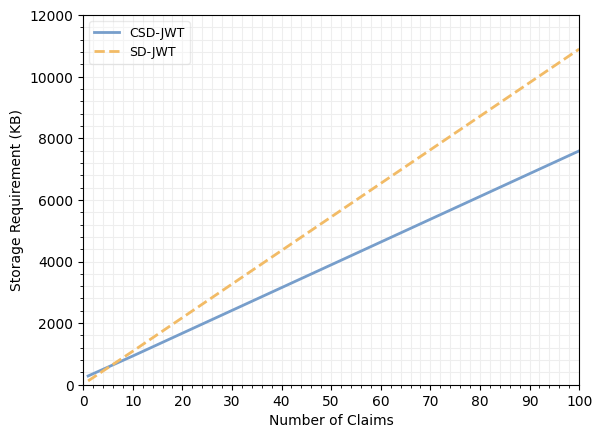

In [3]:
df = pd.read_csv("csv/simulated_size_of_generated_vc.csv", header=None) #, usecols=columns)
print("Contents in csv file:\n", df)
# Create the figure and axis object
fig, ax = plt.subplots()  # This creates both the figure and the axis

# Plot the data
ax.plot(df[0], df[3], label='CSD-JWT', color=csd_color, linestyle='solid', linewidth=2)
ax.plot(df[0], df[6], label='SD-JWT', color=sd_color, linestyle='dashed', linewidth=2)

# Add labels and title (optional)
ax.set_xlabel("Number of Claims")
ax.set_ylabel("Storage Requirement (KB)")

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(2000))

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#EEEEEE', linestyle='solid')
ax.grid(which='minor', color='#EEEEEE', linestyle='solid')

ax.legend(loc='upper left', fancybox=True, framealpha=0.4, prop={'size': 9})
plt.xlim(0, 100)
plt.ylim(0, 12000)
plt.savefig("Storage requirement.png", dpi=600)
plt.show()

Contents in csv file:
       0        1
0     1    22638
1     2    39155
2     3    53994
3     4    69195
4     5    87538
..  ...      ...
95   96  1479790
96   97  1502839
97   98  1515186
98   99  1530129
99  100  1542498

[100 rows x 2 columns]


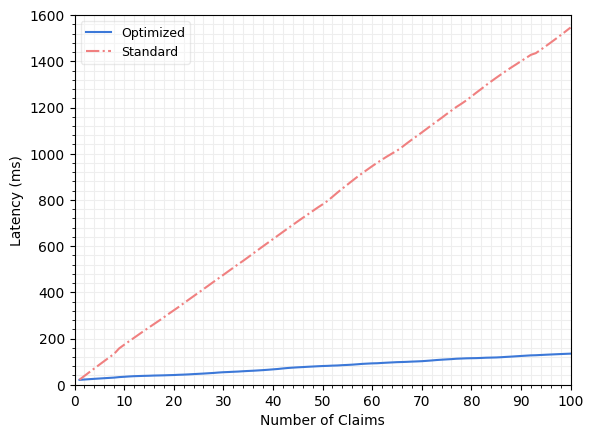

In [4]:
seq_df = pd.read_csv("csv/sequential_verification_time.csv", header=None) #, usecols=columns)
par_df = pd.read_csv("csv/parallel_verification_time.csv", header=None) #, usecols=columns)

print("Contents in csv file:\n", seq_df)
# Create the figure and axis object
fig, ax = plt.subplots()  # This creates both the figure and the axis
window_size=4

seq_df[1] = seq_df[1]/1e3
par_df[1] = par_df[1]/1e3

par_color='#3C78D8'
seq_color='#F08080'

# Plot the data
ax.plot(par_df[0], savgol_filter(par_df[1], window_length=16, polyorder=2), color=par_color, linestyle='solid', label='Optimized')
ax.plot(seq_df[0], savgol_filter(seq_df[1], window_length=16, polyorder=2), color=seq_color, linestyle='dashdot', label='Standard')

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(2e2))

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#EEEEEE', linestyle='solid')
ax.grid(which='minor', color='#EEEEEE', linestyle='solid')

# Add labels and title (optional)
ax.set_xlabel("Number of Claims")
ax.set_ylabel("Latency (ms)")
ax.legend(loc='upper left', fancybox=True, framealpha=0.4, prop={'size': 9})

plt.xlim(0, 100)
plt.ylim(0, 1600)
plt.savefig("Verification Time.png", dpi=600)
plt.show()

    0    1    2    3    4    5     6
0   1   72  212  284   64  447   511
1   2  144  212  356  128  447   575
2   3  216  212  428  192  447   639
3   4  288  212  500  256  447   703
4   5  360  212  572  320  447   767
5   6  432  212  644  384  447   831
6   7  504  212  716  448  447   895
7   8  576  212  788  512  447   959
8   9  648  212  860  576  447  1023
9  10  720  212  932  640  447  1087


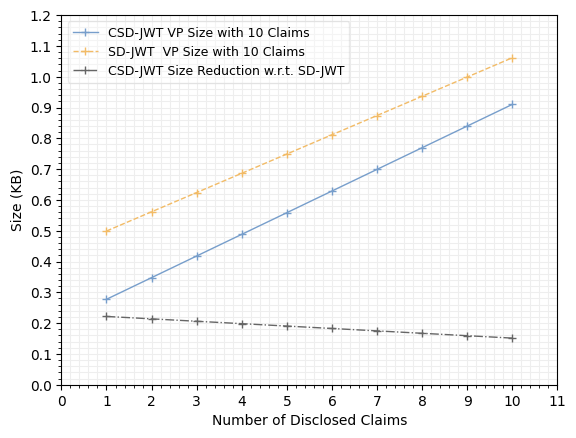

In [5]:
df = pd.read_csv("csv/010_claims_simulated_size_of_generated_vp.csv", header=None)

print(df)

diff_color='#666666'
fig, ax = plt.subplots()  # This creates both the figure and the axis
ax.plot(df[0], df[3]/1024, marker='+', label='CSD-JWT VP Size with 10 Claims', color=csd_color, linestyle='solid', linewidth=1)
ax.plot(df[0], df[6]/1024, marker='+', label='SD-JWT  VP Size with 10 Claims', color=sd_color, linestyle='dashed', linewidth=1)
ax.plot(df[0], (df[6] - df[3])/1024, marker='+', label='CSD-JWT Size Reduction w.r.t. SD-JWT', 
        color=diff_color, linestyle='dashdot', linewidth=1)


# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#EEEEEE', linestyle='solid')
ax.grid(which='minor', color='#EEEEEE', linestyle='solid')    

# Add labels and title (optional)
ax.set_xlabel("Number of Disclosed Claims")
ax.set_ylabel("Size (KB)")
# ax.set_title("Size in bytes of VPs containing 10 claims per claim disclosed")
ax.legend(loc='upper left', fancybox=True, framealpha=0.4, prop={'size': 9})

plt.xlim(0, 11)
plt.ylim(0, 1.2)
plt.savefig("10 Claims VP Size.png", dpi=600)
plt.show()


    0     1    2     3     4     5      6
0   1    74  212   286    64  4317   4381
1  11   814  212  1026   706  4317   5023
2  21  1554  212  1766  1366  4317   5683
3  31  2294  212  2506  2026  4317   6343
4  41  3034  212  3246  2686  4317   7003
5  51  3774  212  3986  3346  4317   7663
6  61  4514  212  4726  4006  4317   8323
7  71  5254  212  5466  4666  4317   8983
8  81  5994  212  6206  5326  4317   9643
9  91  6732  212  6944  5986  4317  10303


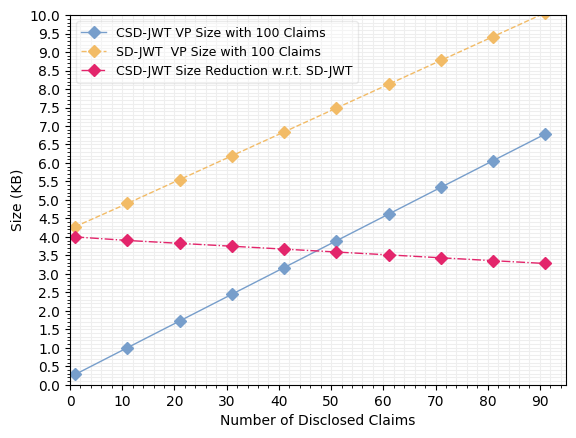

In [6]:
df = pd.read_csv("csv/100_claims_simulated_size_of_generated_vp.csv", header=None)

print(df)

diff_color='#666666'
fig, ax = plt.subplots()  # This creates both the figure and the axis
ax.plot(df[0], df[3]/1024, marker='D', label='CSD-JWT VP Size with 100 Claims', color=csd_color, linestyle='solid', linewidth=1)
ax.plot(df[0], df[6]/1024, marker='D', label='SD-JWT  VP Size with 100 Claims', color=sd_color, linestyle='dashed', linewidth=1)
ax.plot(df[0], (df[6] - df[3])/1024, marker='D', label='CSD-JWT Size Reduction w.r.t. SD-JWT', 
        color='#E3256B', linestyle='dashdot', linewidth=1)


# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#EEEEEE', linestyle='solid')
ax.grid(which='minor', color='#EEEEEE', linestyle='solid')    

# Add labels and title (optional)
ax.set_xlabel("Number of Disclosed Claims")
ax.set_ylabel("Size (KB)")
# ax.set_title("Size in bytes of VPs containing 10 claims per claim disclosed")
ax.legend(loc='upper left', fancybox=True, framealpha=0.4, prop={'size': 9})

plt.xlim(0, 95)
plt.ylim(0, 10)
plt.savefig("100 Claims VP Size.png", dpi=600)
plt.show()

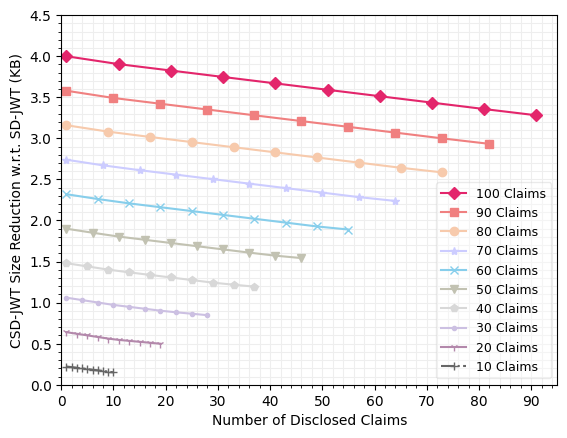

In [7]:
dfs = []

for i in range(1,10):
    dfs.append(pd.read_csv("csv/0"+ str(i) + "0_claims_simulated_size_of_generated_vp.csv", header=None))
dfs.append(pd.read_csv("csv/100_claims_simulated_size_of_generated_vp.csv", header=None))

for df in dfs: 
    df[3] = df[3]/1024
    df[6] = df[6]/1024
    

fig, ax = plt.subplots()

ax.plot(dfs[9][0], dfs[9][6] - dfs[9][3], color='#E3256B', marker='D', label='100 Claims')
ax.plot(dfs[8][0], dfs[8][6] - dfs[8][3], color='#F08080', marker='s', label='90 Claims')
ax.plot(dfs[7][0], dfs[7][6] - dfs[7][3], color='#F7CAAC', marker='o', label='80 Claims')
ax.plot(dfs[6][0], dfs[6][6] - dfs[6][3], color='#CCCCFF', marker='*', label='70 Claims')
ax.plot(dfs[5][0], dfs[5][6] - dfs[5][3], color='#87CEEB', marker='x', label='60 Claims')
ax.plot(dfs[4][0], dfs[4][6] - dfs[4][3], color='#C2C2B2', marker='v', label='50 Claims')
ax.plot(dfs[3][0], dfs[3][6] - dfs[3][3], color='#D8D8D8', marker='p', label='40 Claims')
ax.plot(dfs[2][0], dfs[2][6] - dfs[2][3], color='#CCC0E2', marker='.', label='30 Claims')
ax.plot(dfs[1][0], dfs[1][6] - dfs[1][3], color='#B388AB', marker='1', label='20 Claims')
ax.plot(dfs[0][0], dfs[0][6] - dfs[0][3], color=diff_color, marker='+', linestyle='dashdot', label='10 Claims')

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#EEEEEE', linestyle='solid')
ax.grid(which='minor', color='#EEEEEE', linestyle='solid')    

# Add labels and title (optional)
ax.set_xlabel("Number of Disclosed Claims")
ax.set_ylabel("CSD-JWT Size Reduction w.r.t. SD-JWT (KB)")
ax.legend(loc='lower right', fancybox=True, framealpha=0.4, prop={'size': 9})

plt.xlim(0, 95)
plt.ylim(0, 4.5)
plt.savefig("VP size varying disclosed claims.png", dpi=600)
plt.show()